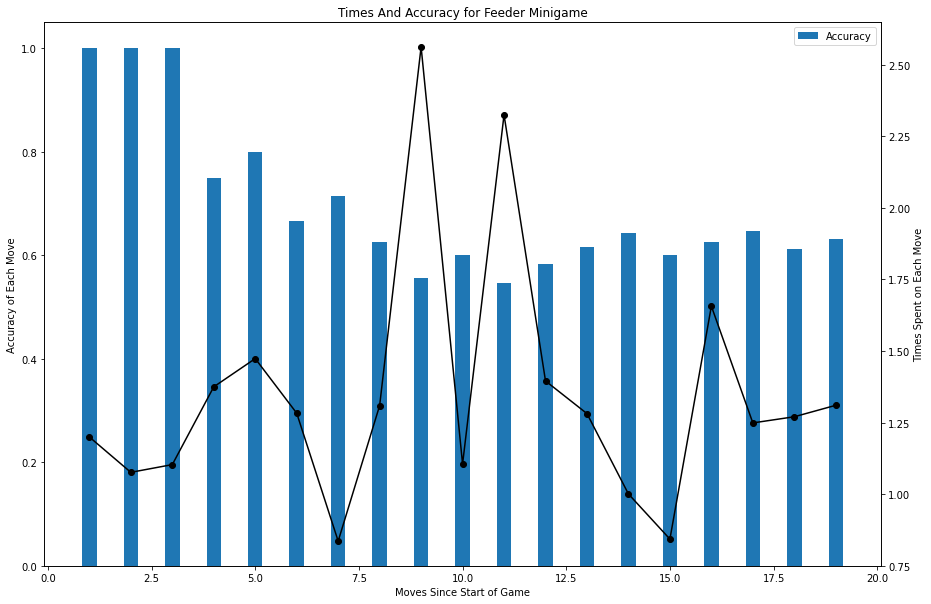

In [6]:
import json
import matplotlib.pyplot as plt
import datetime
import dateutil.parser

# Load data
with open('./feeder_data.json') as f:
    data = json.load(f)
input_data = data.get('metrics')

# Process data
def feedRight(foodList, food, choice):
    if food in foodList:
        if choice == True:
            return True
        else:
            return False
    elif food not in foodList:
        if choice == False:
            return True
        else:
            return False

def getAccuracy(feedList):
    results = []
    sumOfRights = 0
    for i in range(len(feedList)):
        if feedList[i][2]:
            sumOfRights += 1
        accuracy = sumOfRights/(i + 1)
        results.append(accuracy)
    return results

feedList = []
memoryChoice = input_data[0].get('memoryChoice')
Id = 0
for i in memoryChoice:
    Id += 1
    foodList = i.get('objectsSet')
    food = i.get('_object')
    eventTime = i.get('eventTime')
    choiceTime = i.get('choiceTime')
    d_time = (dateutil.parser.parse(choiceTime) - dateutil.parser.parse(eventTime)).total_seconds()
    choice = i.get('choice')
    result = feedRight(foodList, food, choice)
    feedList.append((Id, d_time, result))

accuracy = getAccuracy(feedList)
        
# Create figure
axes1, fig = plt.subplots(figsize=(15, 10))
axes2 = plt.twinx()
width = 0.35

# Plot data
xs = [x for (x, dt, v) in feedList]
dts = [dt for (x, dt, v) in feedList]
ys = accuracy
axes2.plot(xs, dts, '-o', color = 'k', label='Time')
fig.bar(xs, ys, width, label='Accuracy')


# Misc. Figure Setup
fig.set_title('Times And Accuracy for Feeder Minigame')
fig.set_xlabel('Moves Since Start of Game')
axes2.set_ylabel('Times Spent on Each Move')
fig.set_ylabel('Accuracy of Each Move')
fig.legend()
